**<center style="font-size:300%">미니프로젝트2 - 드라마 데이터분석</center>**
<div style="text-align: right"> 프로젝트2 기간: 2022.04.01 ~ 2022.04.07 </div> 
<br> 
<br> 
<br>
<div style="text-align: right; font-size:180%"> 그날의 온도 </div>
<div style="text-align: right; font-size:120%"> 김태완, 백인엽, 유지현, 정시언, 정인모 </div>
<br>

##### **배경**
##### 콘텐츠는 끊임없이 최신 기술과 환경변화에 적응하면서 생태계를 확장해왔고, 최근 OTT, 신기술 등은 방송영상콘텐츠의 새로운 확장의 기회를 주고 있다. 2020년 JTBC에서 방영돼 최고시청률 18.3% (닐슨코리아, 수도권 유료가구)를 기록한 '이태원 클라스'는 일본에서 리메이크가 확정됐다. 또한 최근 ‘밥 잘 사주는 예쁜 누나’ 또한 인도에서 리메이크를 확정지었다. 방송가와 시청자들의 호평을 이끈 드라마들을 분석 및 예측하여 K-콘텐츠 성장에 기여하고자 한다.

##### **주제**
##### K-드라마 프로그램, 작가, 채널, 방영시간대, 시청률 등의 TV 콘텐츠 DB(출처: TNMS TV 컨텐츠 모니터링 데이터) 로 드라마 프로그램의 성연령별 선호도를 분석 및 예측

##### **결과**
##### 학습결과 87%: 시청률 예측시 87%의 정확도를 보인다.
<br>

-----------------------------------------------

## **모듈 import**

In [1]:
#필요 모듈
import numpy as np
import pandas as pd # 데이터셋

#경고창 제거
import warnings
warnings.filterwarnings(action="ignore")

#전처리 및 모델 구축
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 

#학습
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost

## **데이터 준비**

In [23]:
# 방송사, 시청률 데이터
df = pd.read_csv('TN_K_DRAMA_CST_AUDERT_INFO.csv', encoding='cp949')

In [7]:
# 장르, 작가 데이터
df_gen = pd.read_csv('drama_genre_200.csv', encoding='cp949')

## **데이터 전처리**

In [8]:
# 장르와 작가 데이터를 기존 데이터 프레임에 추가
genre = []
writer = []
for i in df.PROGRM_NM:
    genre.append(df_gen.loc[df_gen.제목 == i].iloc[:,2].values[0])
    writer.append(df_gen.loc[df_gen.제목 == i].iloc[:,1].values[0])

In [9]:
df["GENRE"] = genre
df["WRITER"] = writer

In [24]:
df.head()

,BRDCST_DE,CHNNEL_NM,PROGRM_BEGIN_TIME,PROGRM_END_TIME,PROGRM_NM,PROGRM_DC,BRDCST_TME_NM,PROGRM_BRDCST_AREA_NM,BRDCST_TIME,PROGRM_GENRE_LCLAS_NM,...,MALE_N50S_WTCHNG_RT,MALE_N60S_ABOVE_WTCHNG_RT,FEMALE_4_9YO_WTCHNG_RT,FEMALE_N10S_WTCHNG_RT,FEMALE_N20S_WTCHNG_RT,FEMALE_N30S_WTCHNG_RT,FEMALE_N40S_WTCHNG_RT,FEMALE_N50S_WTCHNG_RT,FEMALE_N60S_ABOVE_WTCHNG_RT,CST_CN
0,20200801,KBS2,142652,152608,그놈이그놈이다,<7회>,7회,전국,5916,드라마&영화,...,0.27966,0.94113,0.16798,0.28583,0.78013,0.56980,0.91242,1.27294,1.08752,"서현주역:황정음,황지우역:윤현민,박도겸역:서지훈,김선희역:최명길,한서윤역:조우리,서..."
1,20200801,KBS2,153659,163619,그놈이그놈이다,<8회>,8회,전국,5920,드라마&영화,...,1.09094,0.85427,2.71430,0.35422,0.76373,0.63946,1.33327,1.06163,1.05816,"서현주역:황정음,황지우역:윤현민,박도겸역:서지훈,김선희역:최명길,한서윤역:조우리,서..."
2,20200801,KBS2,164911,172445,한번다녀왔습니다,<71회>,71회,전국,3534,드라마&영화,...,1.84768,1.59782,2.41201,0.22563,0.71379,0.32090,1.42744,1.80667,2.23325,"송영달역:천호진,장옥분역:차화연,최윤정역:김보연,강초연역:이정은,송나희역:이민정,윤..."
3,20200801,KBS2,172558,180002,한번다녀왔습니다,<72회>,72회,전국,3404,드라마&영화,...,3.03496,2.40529,1.29431,0.89403,1.58100,0.61488,2.05049,3.01190,4.06106,"송영달역:천호진,장옥분역:차화연,최윤정역:김보연,강초연역:이정은,송나희역:이민정,윤..."
4,20200801,KBS2,200047,203602,한번다녀왔습니다,<73회>,73회,전국,3515,드라마&영화,...,15.80473,23.23686,8.50071,4.71792,6.00506,9.07805,10.97205,21.75954,25.94442,"송영달역:천호진,장옥분역:차화연,최윤정역:김보연,강초연역:이정은,송나희역:이민정,윤..."


In [10]:
# 년월일 데이터를 잘라 각 컬럼으로 추가
year = []
month = []
day = []

for i in df['BRDCST_DE'].values:
    year.append(int(str(i)[0:4]))
    month.append(int(str(i)[4:6]))
    day.append(int(str(i)[6:8]))

In [11]:
# 기존 년,월,일 컬럼 제거
df.drop("BRDCST_DE", axis=1, inplace=True)

In [12]:
df["BRDCST_DE_YEAR"] = year
df["BRDCST_DE_MONTH"] = month
df["BRDCST_DE_DAY"] = day

In [13]:
# 시작 시간 데이터를 잘라 각 컬럼으로 추가
hr = []
mit = []
sec = []
li = []
for i in df.PROGRM_BEGIN_TIME:
    li.append("0"*(6-len(str(i))) + str(i)) #6자리수는 0을 붙일 필요없고 그대로 나와서 자름, 5자리수는 0을 앞에 붙이고 나열해서 자름
    
for i in li:
    hr.append(int(i[0:2]))
    mit.append(int(i[2:4]))
    sec.append(int(i[4:6]))

In [14]:
df["PROGRM_BEGIN_TIME_HOUR"] = hr
df["PROGRM_BEGIN_TIME_MIN"] = mit
df["PROGRM_BEGIN_TIME_SEC"] = sec

In [15]:
# 끝 시간 데이터를 잘라 각 컬럼으로 추가
hr = []
mit = []
sec = []
li = []
for i in df.PROGRM_END_TIME:
    li.append("0"*(6-len(str(i))) + str(i)) 

for i in li:
    hr.append(int(i[0:2]))
    mit.append(int(i[2:4]))
    sec.append(int(i[4:6]))

In [25]:
df.PROGRM_END_TIME

0        152608
1        163619
2        172445
3        180002
4        203602
          ...  
75927     13159
75928     15959
75929     12849
75930     15959
75931     15759
Name: PROGRM_END_TIME, Length: 75932, dtype: int64

In [16]:
df["PROGRM_END_TIME_HOUR"] = hr
df["PROGRM_END_TIME_MIN"] = mit
df["PROGRM_END_TIME_SEC"] = sec

In [17]:
# 방영 시간 데이터를 잘라 각 컬럼으로 추가
mit = []
sec = []
li = []
for i in df.BRDCST_TIME:
    li.append("0"*(6-len(str(i))) + str(i))

for i in li:
    mit.append(int(i[0:2])*60 + int(i[2:4]))
    sec.append(int(i[4:6]))

In [18]:
df["BRDCST_TIME_MIN"] = mit
df["BRDCST_TIME_SEC"] = sec

In [19]:
# 분석에 필요 없는 데이터 제거
df.drop(["PROGRM_BEGIN_TIME", "PROGRM_END_TIME", "PROGRM_DC", "BRDCST_TME_NM", "PROGRM_BRDCST_AREA_NM",
        "BRDCST_TIME", "PROGRM_GENRE_LCLAS_NM", "PROGRM_GENRE_MLSFC_NM", "PROGRM_GENRE_SCLAS_NM", "CST_CN", "PROGRM_NM"], axis=1, inplace=True)

In [20]:
#데이터 칼럼 순서별 정리
df = df[["CHNNEL_NM", "GENRE", "WRITER", "BRDCST_DE_YEAR", "BRDCST_DE_MONTH", "BRDCST_DE_DAY", "PROGRM_BEGIN_TIME_HOUR", "PROGRM_BEGIN_TIME_MIN", "PROGRM_BEGIN_TIME_SEC",
             "PROGRM_END_TIME_HOUR", "PROGRM_END_TIME_MIN", "PROGRM_END_TIME_SEC", "BRDCST_TIME_MIN", "BRDCST_TIME_SEC",
             "MALE_4_9YO_WTCHNG_RT", "MALE_N10S_WTCHNG_RT", "MALE_N20S_WTCHNG_RT", "MALE_N30S_WTCHNG_RT",
             "MALE_N40S_WTCHNG_RT", "MALE_N50S_WTCHNG_RT", "MALE_N60S_ABOVE_WTCHNG_RT",
             "FEMALE_4_9YO_WTCHNG_RT", "FEMALE_N10S_WTCHNG_RT", "FEMALE_N20S_WTCHNG_RT", "FEMALE_N30S_WTCHNG_RT",
             "FEMALE_N40S_WTCHNG_RT", "FEMALE_N50S_WTCHNG_RT", "FEMALE_N60S_ABOVE_WTCHNG_RT"]]

In [22]:
df.head()

,CHNNEL_NM,GENRE,WRITER,BRDCST_DE_YEAR,BRDCST_DE_MONTH,BRDCST_DE_DAY,PROGRM_BEGIN_TIME_HOUR,PROGRM_BEGIN_TIME_MIN,PROGRM_BEGIN_TIME_SEC,PROGRM_END_TIME_HOUR,...,MALE_N40S_WTCHNG_RT,MALE_N50S_WTCHNG_RT,MALE_N60S_ABOVE_WTCHNG_RT,FEMALE_4_9YO_WTCHNG_RT,FEMALE_N10S_WTCHNG_RT,FEMALE_N20S_WTCHNG_RT,FEMALE_N30S_WTCHNG_RT,FEMALE_N40S_WTCHNG_RT,FEMALE_N50S_WTCHNG_RT,FEMALE_N60S_ABOVE_WTCHNG_RT
0,KBS2,로맨틱코미디,이은영,2020,8,1,14,26,52,15,...,0.91639,0.27966,0.94113,0.16798,0.28583,0.78013,0.56980,0.91242,1.27294,1.08752
1,KBS2,로맨틱코미디,이은영,2020,8,1,15,36,59,16,...,1.09392,1.09094,0.85427,2.71430,0.35422,0.76373,0.63946,1.33327,1.06163,1.05816
2,KBS2,로맨틱코미디,양희승,2020,8,1,16,49,11,17,...,0.93119,1.84768,1.59782,2.41201,0.22563,0.71379,0.32090,1.42744,1.80667,2.23325
3,KBS2,로맨틱코미디,양희승,2020,8,1,17,25,58,18,...,0.59891,3.03496,2.40529,1.29431,0.89403,1.58100,0.61488,2.05049,3.01190,4.06106
4,KBS2,로맨틱코미디,양희승,2020,8,1,20,0,47,20,...,8.35386,15.80473,23.23686,8.50071,4.71792,6.00506,9.07805,10.97205,21.75954,25.94442


----------------------------------------

##### 원본 데이터 분석

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns #Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

# 4-9세(여)의 시청률 
sns.barplot(x='PROGRM_BEGIN_TIME_HOUR',y='FEMALE_4_9YO_WTCHNG_RT',data=df)

+ 4-9세(여)는 오전8시, 오후19시의 시청률이 가장 높다.

In [19]:
df1 = df

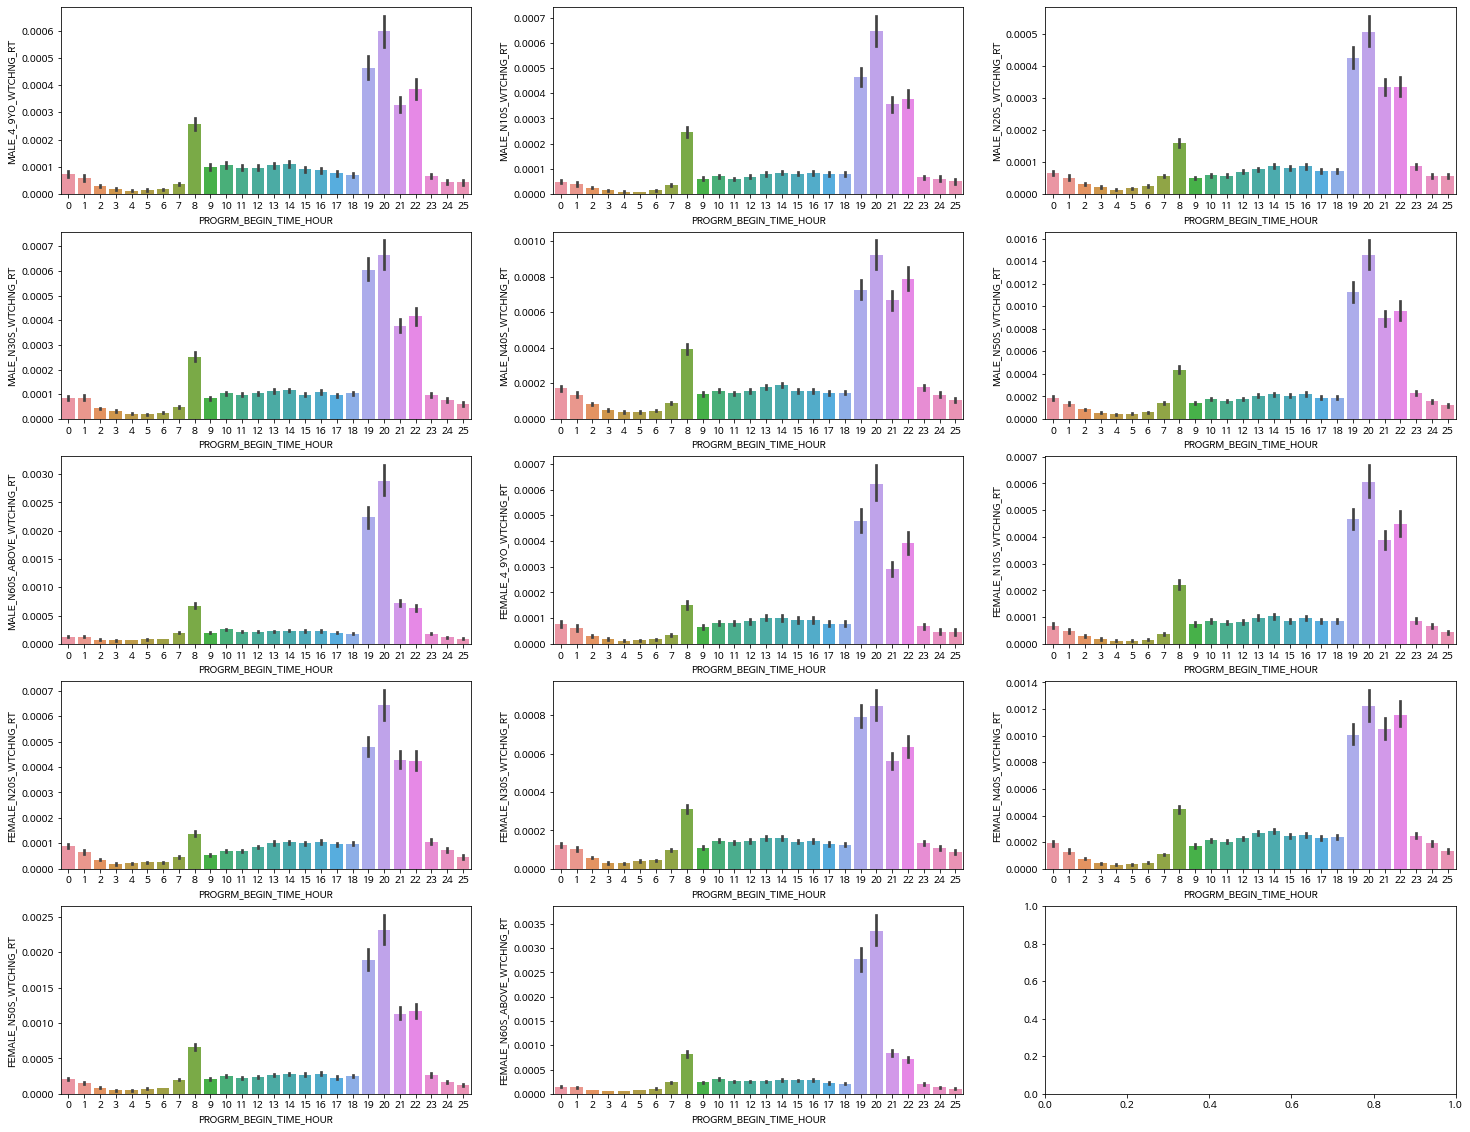

In [20]:
fig, ax = plt.subplots(nrows =5, ncols = 3, figsize = (25,20))

num = 0
ax = ax.flatten() #numpy에서 제공하는 다차원 배열 공간을 1차원으로 평탄화해주는 함수

# 성연령 별 시청률 전체 시각화
for col in list(df.columns[14:28]):
    sns.barplot(x=df1['PROGRM_BEGIN_TIME_HOUR'],y=df1[col]/1000,ax=ax[num])
    num += 1
    
plt.show()

+ 시간대 별 시청률 결과 전 성, 연령 공통적으로 오전8시, 오후19시에 가장 시청률이 높다.(0.5% ~ 3.5%)

In [21]:
# 스타일 추가
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75932 entries, 0 to 75931
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CHNNEL_NM                    75932 non-null  object 
 1   GENRE                        75932 non-null  object 
 2   WRITER                       75932 non-null  object 
 3   BRDCST_DE_YEAR               75932 non-null  int64  
 4   BRDCST_DE_MONTH              75932 non-null  int64  
 5   BRDCST_DE_DAY                75932 non-null  int64  
 6   PROGRM_BEGIN_TIME_HOUR       75932 non-null  int64  
 7   PROGRM_BEGIN_TIME_MIN        75932 non-null  int64  
 8   PROGRM_BEGIN_TIME_SEC        75932 non-null  int64  
 9   PROGRM_END_TIME_HOUR         75932 non-null  int64  
 10  PROGRM_END_TIME_MIN          75932 non-null  int64  
 11  PROGRM_END_TIME_SEC          75932 non-null  int64  
 12  BRDCST_TIME_MIN              75932 non-null  int64  
 13  BRDCST_TIME_SEC 

<AxesSubplot:xlabel='MALE_N40S_WTCHNG_RT', ylabel='CHNNEL_NM'>

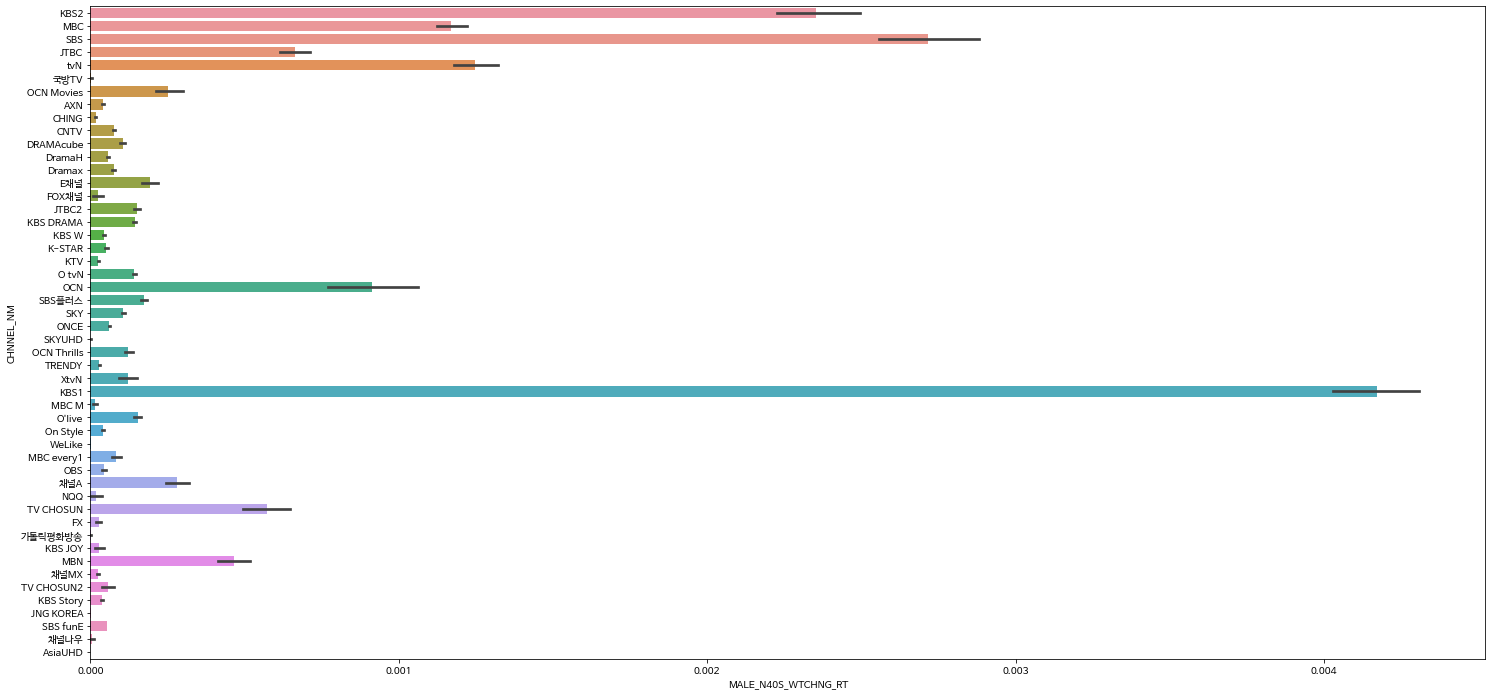

In [6]:
# 채널 별 시청률 시각화
plt.figure(figsize=(25,12))
sns.barplot(x=df['MALE_N40S_WTCHNG_RT']/1000,y=df['CHNNEL_NM'],data=df)

채널 별 시청률 결과:
+ 4~9세(여), 10대(여), 20대(남,여), 30대(남,여), 50대(남,여)의 주 시청 채널은 KBS1이며, 두번째로 많이 보는 채널은 KBS2이다. 
+ 40대(여)의 주 시청 채널은 KBS1이며, 두번째로 많이 보는 채널은 JTBC이다. 
+ 4~9세(남), 10대(남), 40대(남)의 주 시청 채널은 KBS1이며, 두번째로 많이 보는 채널은 SBS이다. 

<AxesSubplot:xlabel='FEMALE_N10S_WTCHNG_RT', ylabel='GENRE'>

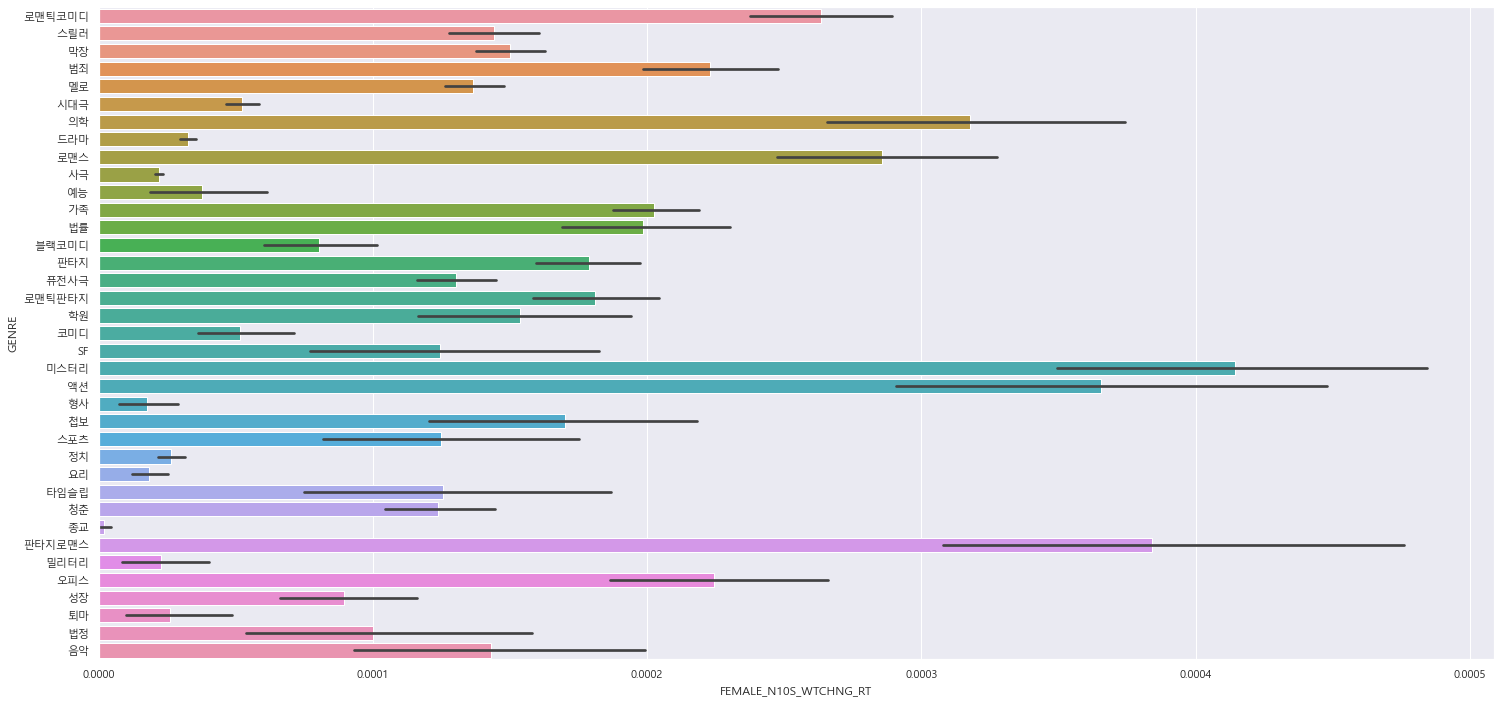

In [24]:
# 프로그램 장르 별 시청률 시각화
plt.figure(figsize=(25,12))
sns.barplot(x=df['FEMALE_N10S_WTCHNG_RT']/1000,y=df['GENRE'],data=df)

장르 별 시청률 결과:
+ 4~9세(여), 10대(여), 20대(남,여), 30대(남,여), 50대(남,여)의 주 시청 장르는 KBS1이며, 두번째로 많이 보는 장르는 KBS2이다. 
+ 40대(여)의 주 시청 장르는 KBS1이며, 두번째로 많이 보는 장르는 JTBC이다. 
+ 4~9세(남), 10대(남), 40대(남)의 주 시청 장르는 KBS1이며, 두번째로 많이 보는 장르는 SBS이다. 

<AxesSubplot:xlabel='MALE_N40S_WTCHNG_RT', ylabel='WRITER'>

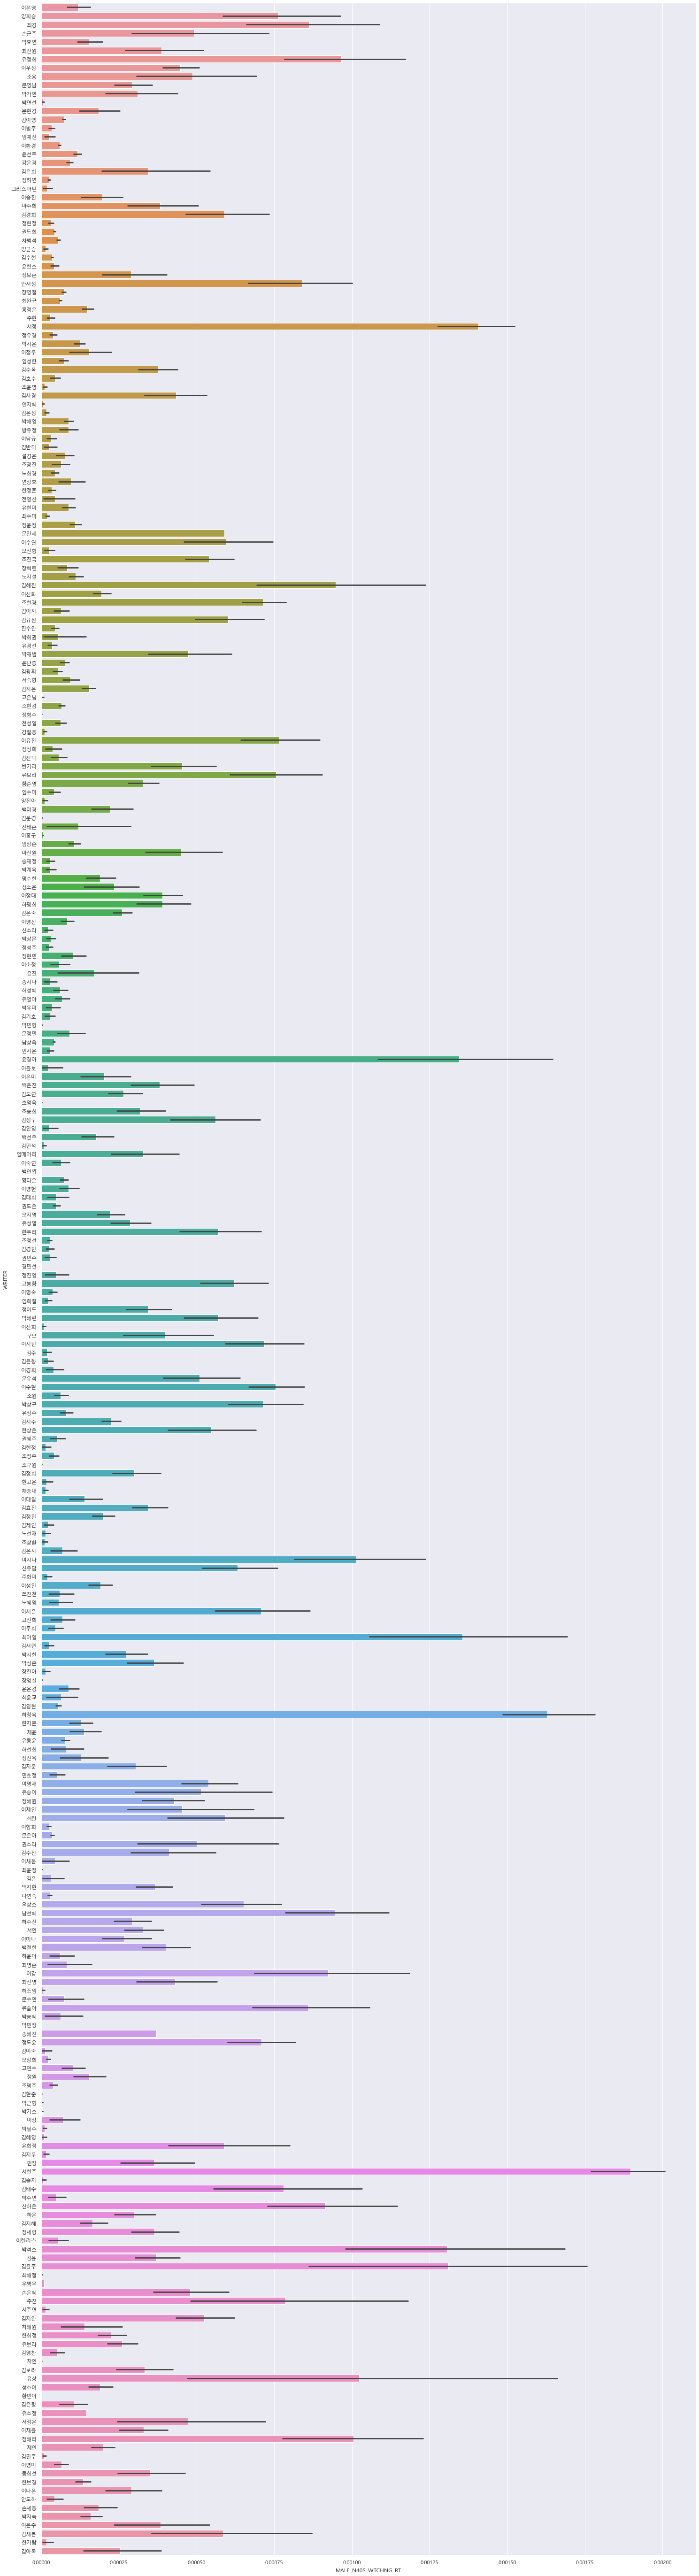

In [25]:
plt.figure(figsize=(25,100))
sns.barplot(x=df['MALE_N40S_WTCHNG_RT']/1000,y=df['WRITER'],data=df)

배우 별 시청률 결과:
+ 4~9세(여), 10대(여), 20대(남,여), 30대(남,여), 50대(남,여)의 주 시청 배우는 KBS1이며, 그 다음 시청률이 높은 배우는 KBS2이다. 
+ 40대(여)의 주 시청 배우는 KBS1이며, 그 다음 시청률이 높은 배우는 JTBC이다. 
+ 4~9세(남), 10대(남), 40대(남)의 주 시청 배우는 KBS1이며, 그 다음 시청률이 높은 배우는 SBS이다. 

----------------------------

In [17]:
# 범주형, 연속형 변수의 스케일 조정
ct = make_column_transformer(
    (OneHotEncoder(), ["CHNNEL_NM", "GENRE", "WRITER"])
)

In [18]:
# 트레이닝 데이터에 대해서 fit 작업과 transform 작업을 적용
newCols = ct.fit_transform(df).toarray()
df.drop(["CHNNEL_NM", "GENRE", "WRITER"], axis = 1, inplace = True)
df = pd.concat([pd.DataFrame(newCols),df], axis = 1)

In [19]:
# 성연령 별 나누기
dic = {}
dic2 = {}
for s in ["MALE", "FEMALE"]:
    for age in ["4_9YO", "N10S", "N20S", "N30S", "N40S", "N50S", "N60S_ABOVE"]:
        li = []
        for i in df[f"{s}_{age}_WTCHNG_RT"]:
            if(i >= 50):
                li.append(5)
            elif(i >= 10):
                li.append(4)
            elif(i >= 5):
                li.append(3)
            elif(i >= 1):
                li.append(2)
            elif(i >= 0.1):
                li.append(1)
            else:
                li.append(0)
        dic2[age] = li
    dic[s] = dic2
    
for s in ["MALE", "FEMALE"]:
    for age in ["4_9YO", "N10S", "N20S", "N30S", "N40S", "N50S", "N60S_ABOVE"]:
        df.drop(f"{s}_{age}_WTCHNG_RT", axis = 1)
for s in ["MALE", "FEMALE"]:
    for age in ["4_9YO", "N10S", "N20S", "N30S", "N40S", "N50S", "N60S_ABOVE"]:        
        df[f"{s}_{age}_WTCHNG_RT"] = dic[s][age]

In [20]:
df

,0,1,2,3,4,5,6,7,8,9,...,MALE_N40S_WTCHNG_RT,MALE_N50S_WTCHNG_RT,MALE_N60S_ABOVE_WTCHNG_RT,FEMALE_4_9YO_WTCHNG_RT,FEMALE_N10S_WTCHNG_RT,FEMALE_N20S_WTCHNG_RT,FEMALE_N30S_WTCHNG_RT,FEMALE_N40S_WTCHNG_RT,FEMALE_N50S_WTCHNG_RT,FEMALE_N60S_ABOVE_WTCHNG_RT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,2,1,1,1,1,1,2,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,2,2,1,1,1,2,2,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,2,2,1,1,1,2,2,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,2,2,1,2,1,2,2,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,4,4,3,2,3,3,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
75928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
75929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
75930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,0,0,0,1,1,1


## **모델 학습**

In [21]:
# 칼럼의 순서를 정수로 추출
X = df.iloc[:, :-14] # int location
y = df.iloc[:,-14:]

# 훈련/시험 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) #학습 / 테스트 셋의 크기 비율은 80% / 20%

# 분류 예측
rf_model = RandomForestClassifier() 
rf_model.fit(X_train,y_train)
rf_result = rf_model.predict_proba(X_test) #예측을 수행, 각 클래스에 대한 확률,  n 줄 k 열 배열 을 되 돌려 줍 니 다.
rf_pred = rf_model.predict(X_test) #예측 한 탭 을 직접 되 돌려 줍 니 다.

In [22]:
pd.DataFrame(rf_pred)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,0,1,1,0,1,0,1,0,1,1,0,1
2,0,0,0,1,1,1,1,0,0,0,1,1,1,1
3,0,0,0,0,1,1,0,0,0,0,0,1,1,0
4,0,0,0,0,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15182,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15183,0,0,0,0,1,1,1,0,0,0,0,1,1,1
15184,0,0,1,0,0,1,1,0,0,1,0,0,1,1
15185,0,0,0,1,1,1,1,0,0,0,1,1,1,1


In [23]:
y_test

,MALE_4_9YO_WTCHNG_RT,MALE_N10S_WTCHNG_RT,MALE_N20S_WTCHNG_RT,MALE_N30S_WTCHNG_RT,MALE_N40S_WTCHNG_RT,MALE_N50S_WTCHNG_RT,MALE_N60S_ABOVE_WTCHNG_RT,FEMALE_4_9YO_WTCHNG_RT,FEMALE_N10S_WTCHNG_RT,FEMALE_N20S_WTCHNG_RT,FEMALE_N30S_WTCHNG_RT,FEMALE_N40S_WTCHNG_RT,FEMALE_N50S_WTCHNG_RT,FEMALE_N60S_ABOVE_WTCHNG_RT
11317,0,0,0,1,0,1,0,0,0,0,1,0,1,0
65550,0,0,0,1,0,0,1,0,0,0,1,0,0,1
41226,0,0,0,1,1,1,1,0,0,0,1,1,1,1
63864,0,1,0,0,1,1,1,0,1,0,0,1,1,1
5164,0,1,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38746,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24811,0,0,0,0,0,1,0,0,0,0,0,0,1,0
38854,0,0,1,0,0,1,0,0,0,1,0,0,1,0
36617,0,0,1,0,1,1,1,0,0,1,0,1,1,1


In [ ]:
# 칼럼의 순서를 정수로 추출
X = df.iloc[:, 0:-14]
y = df.iloc[:,-14]

# 훈련/시험 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# 6가지 학습 방법
rf_model = RandomForestClassifier() #교차 검증
ada_model = AdaBoostClassifier() #가중치 업데이트
lr_model = LogisticRegression() #독립변수 한 개와 종속 변수 간의 상관 관계
svc_model = SVC(probability=True) #오차 기반 분류 선 찾기
meta_model = KNeighborsClassifier() #약한 분류기를 세트로 묶어서 정확도 예측
xgb_param = {
    "n_estimators":100, 
     "learning_rate":0.08, 
     "gamma":0, 
      "subsample":0.75,
      "colsample_bytree":1, 
      "max_depth":7,
    "verbosity":0
}
xgb_model = xgboost.XGBClassifier(**xgb_param) #경사 하강법을 통한 부스팅, 각 모델들 예측치를 다시 예측

# 학습
rf_model.fit(X_train,y_train)
ada_model.fit(X_train,y_train)
lr_model.fit(X_train,y_train)
svc_model.fit(X_train,y_train)
xgb_model.fit(X_train,y_train)

# 불확실성 추정
rf_result = rf_model.predict_proba(X_test)
ada_result = ada_model.predict_proba(X_test)
lr_result = lr_model.predict_proba(X_test)
svc_result = svc_model.predict_proba(X_test)
xgb_result = xgb_model.predict_proba(X_test)

# 검증 척도
print("rf_model :",rf_model.score(X_test,y_test))
print("ada_model :",ada_model.score(X_test,y_test))
print("lr_model :",lr_model.score(X_test,y_test))
print("svc_model :",svc_model.score(X_test,y_test))
print("xgb_model :",xgb_model.score(X_test,y_test))

# train 예측 및 평가
v1 = rf_model.predict(X_train)
v2 = ada_model.predict(X_train)
v3 = lr_model.predict(X_train)
v4 = svc_model.predict(X_train)
v5 = xgb_model.predict(X_train)
X_train_meta = np.c_[v1,v2,v3,v4,v5]

meta_model.fit(X_train_meta,y_train) #예측의 결과값, 결과값에 대한 학습, 최종 한 번만 해준다.

# test 최종 평가 (test 평가 데이터셋 모델 성능 최종 측정)
v1 = rf_model.predict(X_test)
v2 = ada_model.predict(X_test)
v3 = lr_model.predict(X_test)
v4 = svc_model.predict(X_test)
v5 = xgb_model.predict(X_test)
X_test_meta = np.c_[v1,v2,v3,v4,v5]

meta_model.score(X_test_meta,y_test)

## **결과 해석**